# Machine learning Model Building

In [53]:
# Import the necessary tools
import sklearn
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [54]:
df = pd.read_csv('E:\\Neoron\\Programming_Practice\\Machine_Learning_Project\\cement_strength_reg\\dataset\\data.csv')
df.head()

,Cement,Blast_Furnace_Slag_,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_day,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.9861
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.8874
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.2695
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.0528
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.2961


In [55]:
#Define inputs and targets
input_columns =df.columns.drop('Concrete_compressive_strength')
inputs = df[input_columns]
targets = df['Concrete_compressive_strength']

In [56]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.25, random_state=0)

In [57]:
#standard Scaling of numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
# Set up our K-Fold situation to have 5 splits

kf = KFold(n_splits=5, shuffle=True, random_state=0)

## Getting a Baseline Score for Different Regression Models

Here, we will get a baseline score for a group of the most common regression models. Once we see which one performs best at a baseline, we can tune that model for optimal performance.

In [59]:
# Define a helper function to get a baseline score using K-fold cross validation for our models.
def ModelScoreWithCV(model):
    score = cross_val_score(model, X_train, y_train, cv= kf, scoring="r2")
    print("Baseline mean R-squared from K-fold CV of {} is {}".format(model, round(np.mean(score), 4)))


In [60]:

# create a list of model and score
model_name = []
model_score = []

# Define a helper function to get a baseline score using K-fold cross validation for our models.
def ModelScoreWithCV(model):
    score = cross_val_score(model, X_train, y_train, cv= kf, scoring="r2")
    model_name.append(model)
    model_score.append(round(np.mean(score), 4))
    print("Baseline mean R-squared from K-fold CV of {} is {}".format(model, round(np.mean(score), 4)))


models = [LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor()]

for model in models:
    ModelScoreWithCV(model)


Baseline mean R-squared from K-fold CV of LinearRegression() is 0.5766
Baseline mean R-squared from K-fold CV of Ridge() is 0.5769
Baseline mean R-squared from K-fold CV of Lasso() is 0.531
Baseline mean R-squared from K-fold CV of DecisionTreeRegressor() is 0.7843


Baseline mean R-squared from K-fold CV of RandomForestRegressor() is 0.8802
Baseline mean R-squared from K-fold CV of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) is 0.902


## Hyperparameter Tuning

We again use K-fold Cross Validation to try different values for key hyperparameters for optimal performance as judged by an R-squared score.

In [61]:
# Define a helper function to use K-fold CV to test hyperparameters
def TestXGBParams(**params):
    score = cross_val_score(XGBRegressor(**params, n_jobs=-1, random_state=23), X_train, y_train, cv= kf, scoring="r2")
    print("Mean R-squared from K-fold CV with {} is {}".format(params, round(np.mean(score), 4)))

#### Optimizing n_estimators

In [62]:
estimators = [1,2,4,8,16,32,64,128,256]
for n in estimators:
    TestXGBParams(n_estimators=n)

Mean R-squared from K-fold CV with {'n_estimators': 1} is 0.3749
Mean R-squared from K-fold CV with {'n_estimators': 2} is 0.5972
Mean R-squared from K-fold CV with {'n_estimators': 4} is 0.7834
Mean R-squared from K-fold CV with {'n_estimators': 8} is 0.8701
Mean R-squared from K-fold CV with {'n_estimators': 16} is 0.8926
Mean R-squared from K-fold CV with {'n_estimators': 32} is 0.8994
Mean R-squared from K-fold CV with {'n_estimators': 64} is 0.9019
Mean R-squared from K-fold CV with {'n_estimators': 128} is 0.9022
Mean R-squared from K-fold CV with {'n_estimators': 256} is 0.9019


### Optimizing max_depth

In [63]:
depths = [1, 2, 4, 8, 16]
for n in depths:
    TestXGBParams(n_estimators = 128, max_depth = n)

Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 1} is 0.8604
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 2} is 0.8925
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4} is 0.9067
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 8} is 0.8832
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 16} is 0.8696


### Optimizing Learning rate

In [64]:
rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,0.4,0.5]
for n in rate:
    TestXGBParams(n_estimators = 128, max_depth = 4, learning_rate = n)

Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.0001} is 0.0129
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.001} is 0.146
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.01} is 0.7146
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.1} is 0.9048
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.2} is 0.9062
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.3} is 0.9067
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.4} is 0.9046
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.5} is 0.8928


### Final Model

In [65]:
model = XGBRegressor(n_estimators = 128, max_depth = 4, learning_rate = 0.3, n_jobs=-1, random_state=23)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=128, n_jobs=-1,
             num_parallel_tree=None, random_state=23, ...)

### Using the Model to Make Predictions on our Test set
Now, the moment of truth. We put our model to use to predict the strengths in the test dataset and get some corresponding scores to see how well it performed.

In [66]:
preds = model.predict(X_test)
r_squared = r2_score(y_test, preds)
MSE = mean_squared_error(y_test, preds)
RMSE = np.sqrt(mean_squared_error(y_test, preds))
MAE = mean_absolute_error(y_test, preds)

print('Our Optimized XGBRegressor got the following scores on the test set:')
print('R-squared: {}'.format(r_squared))
print('MSE: {}'.format(MSE))
print('RMSE: {}'.format(RMSE))
print('MAE: {}'.format(MAE))

Our Optimized XGBRegressor got the following scores on the test set:
R-squared: 0.9217264497289064
MSE: 20.742133841996697
RMSE: 4.554353284715262
MAE: 3.265641516762991


## Feature Importances

Here we get a look at how much each input variable factored in to our final model.

In [67]:
# Create a dataframe showing the feature importances
importances = pd.DataFrame({
    'Feature': inputs.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)
importances

,Feature,Importance
7,Age_day,0.265531
0,Cement,0.214803
4,Superplasticizer,0.152388
3,Water,0.123694
1,Blast_Furnace_Slag_,0.106430
6,Fine_Aggregate,0.075970
2,Fly_Ash,0.040405
5,Coarse_Aggregate,0.020780


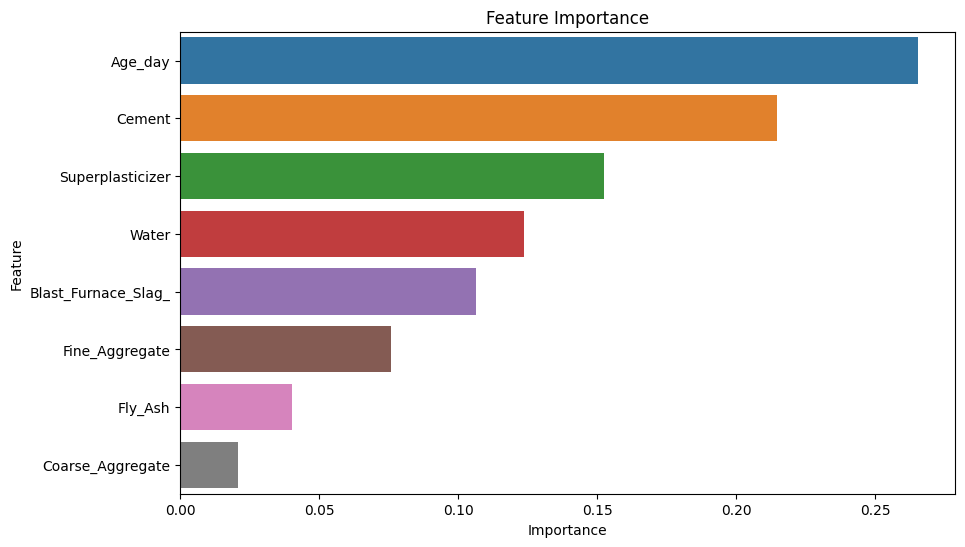

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importances.head(10), x='Importance', y='Feature');